# Proyecto I- Parte V (Core)

**1- Continuar desde la Parte IV**
* Asegúrate de tener el DataFrame df ya cargado y preparado desde la Parte IV.

In [ ]:
# DataFrame desde la Parte IV.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ruta de archivo CSV
ruta = pd.read_csv('/content/retail_sales_ds_limpio.csv')
# Convertir a DataFrame
df = pd.DataFrame(ruta)
# Mostrar los primeros registros
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Normalized amount,Sales Category,Desviación de la Media
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.06329,Baja,-317.475570
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0.49367,Media,556.752137
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.00253,Baja,-428.786550
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.24051,Baja,56.752137
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.03797,Baja,-367.475570


**2- Exploración de Datos Avanzada**
* Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.
* Crea subplots para comparar diferentes variables clave.
* Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

Date                      datetime64[ns]
Customer ID                       object
Gender                            object
Age                                int64
Product Category                  object
Quantity                           int64
Price per Unit                     int64
Total Amount                       int64
Normalized amount                float64
Sales Category                    object
Desviación de la Media           float64
dtype: object


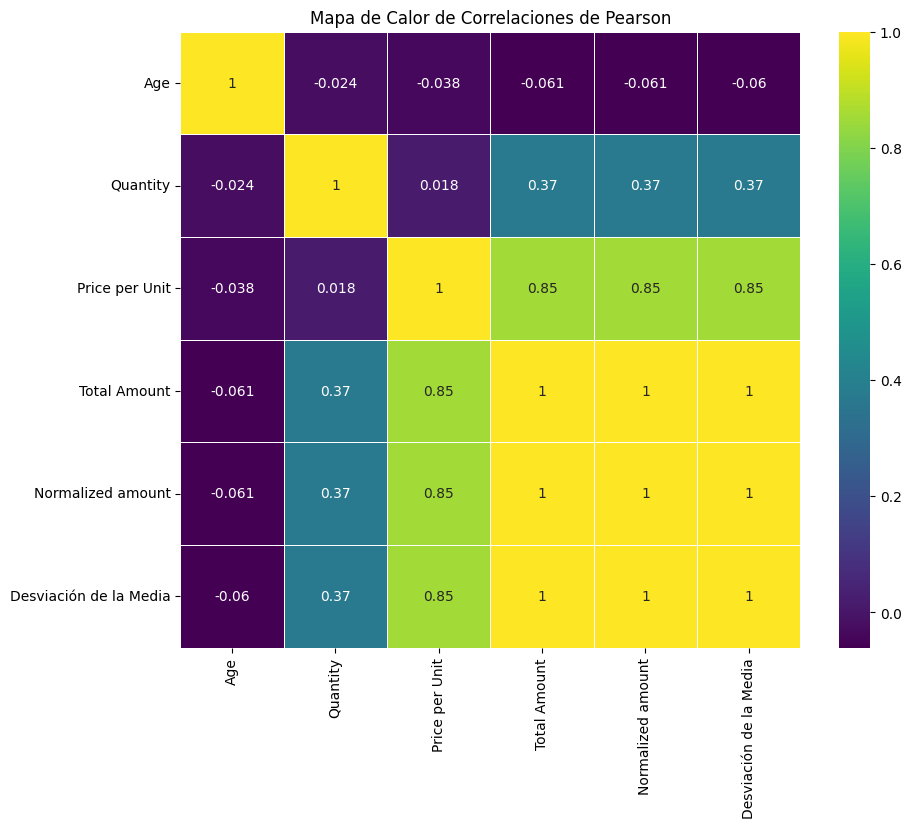

In [ ]:
# Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

# Visualizar tipos de datos
print(df.dtypes)

# Selecciona solo las columnas numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Calcula la matriz de correlación
matriz_correlacion = df_numerico.corr(method='pearson')

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones de Pearson')
plt.show()

***Los colores más oscuros indican correlaciones negativas fuertes, y colores más claros indican correlaciones positivas fuertes. Tenemos datos superior al 0.5 que indica fuerte correlación positiva y datos inferiores a 0.5 que indica fuerte correlación negativa eje: Price per Unit (Positivo) y Age (Negativo)***

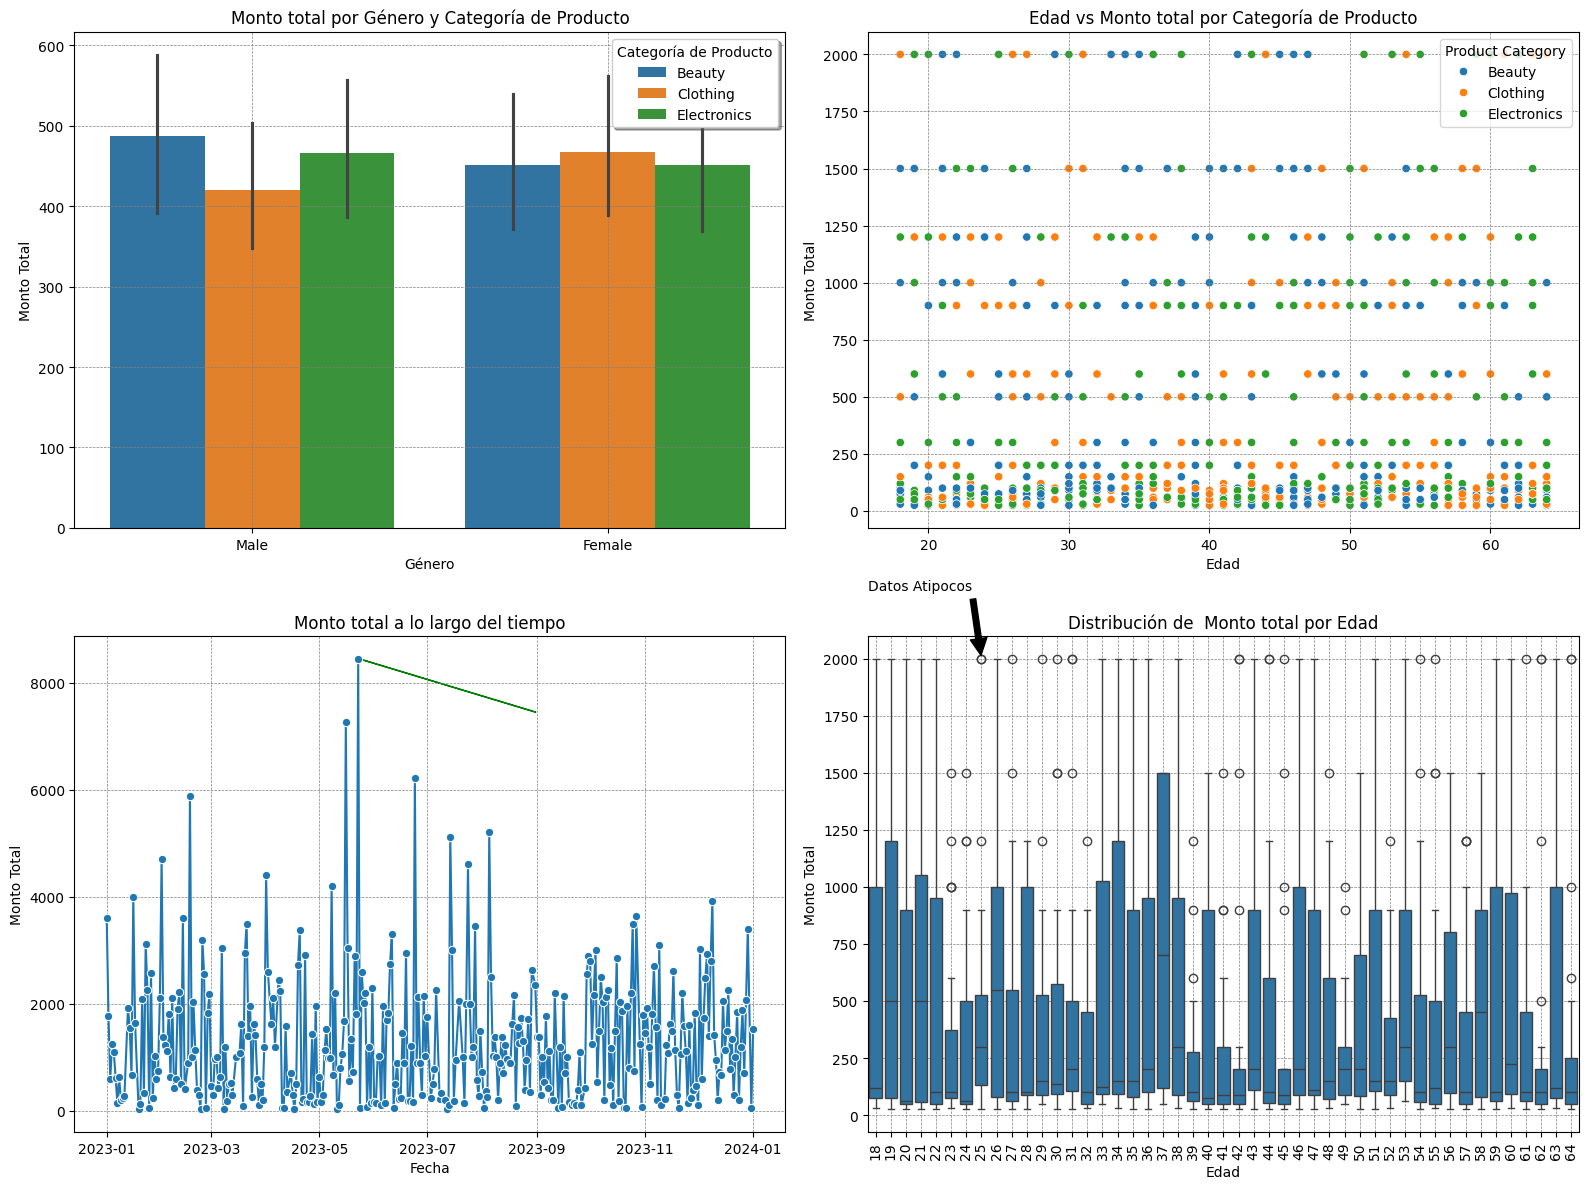

In [ ]:
# Crear una figura con varios subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Gráfico de barras: Monto total por Genero y Categoría de Producto
sns.barplot(data=df, x='Gender', y='Total Amount', hue='Product Category', ax=axs[0, 0])
axs[0, 0].set_title('Monto total por Género y Categoría de Producto')
axs[0, 0].set_xlabel('Género')
axs[0, 0].set_ylabel('Monto Total')
axs[0, 0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
axs[0, 0].legend(title='Categoría de Producto', shadow=True)

# 2. Gráfico de dispersión: Edad vs Monto total por Categoría de Producto
sns.scatterplot(data=df, x='Age', y='Total Amount', hue='Product Category', ax=axs[0, 1])
axs[0, 1].set_title('Edad vs Monto total por Categoría de Producto')
axs[0, 1].set_xlabel('Edad')
axs[0, 1].set_ylabel('Monto Total')
axs[0, 1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# 3. Gráfico de líneas: Monto total a lo largo del tiempo
group_date = df.groupby('Date')['Total Amount'].sum().reset_index()
sns.lineplot(data=group_date, x='Date', y='Total Amount', marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Monto total a lo largo del tiempo')
axs[1, 0].set_xlabel('Fecha')
axs[1, 0].set_ylabel('Monto Total')
axs[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Encontrar el valor máximo y la fecha correspondiente
max_value = group_date['Total Amount'].max()
max_date = group_date[group_date['Total Amount'] == max_value]['Date'].values[0]

# Ajustar flecha (posicionar desde un punto bajo hacia un punto más alto)
axs[1, 0].arrow(max_date, max_value, 100, -1000, head_width=0.8, head_length=2.5, fc='green', ec='green')

# 4. Gráfico de cajas: Distribución de Monto total por Edad
sns.boxplot(data=df, x='Age', y='Total Amount', ax=axs[1, 1])
axs[1, 1].set_title('Distribución de  Monto total por Edad')
axs[1, 1].set_xlabel('Edad')
axs[1, 1].set_ylabel('Monto Total')
axs[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
axs[1, 1].tick_params(axis='x', rotation=90)

# Añadir anotaciones (datos atipicos)
axs[1, 1].annotate('Datos Atipocos', xy=(7, 2000), xytext=(-0.5, 2300),
                   arrowprops=dict(facecolor='black', shrink=0.05))

# Ajustar el layout
plt.tight_layout()
plt.show()


***- Se aprecia que el Géneros de los clientes en conjunto con la Categoría del Producto muestra una distribución uniforme con relación al Monto total.***

***- Se puede observar si hay alguna tendencia en cómo el monto total de ventas varía con la edad de los clientes y Categoría de Producto. La dispersión de los puntos puede indicar la existencia de valores atípicos o variabilidad en las ventas.***

***- La tendencias de ventas a lo largo del tiempo muestra un resultado muy estable con respecto a la Fecha y el Monto Total. Sin embargo, se observan algunos picos significativos durante ciertos meses.***

***- La Edad muestra una distribución asimétrica positiva (sesgada a la derecha) con relación al Monto total y se observan numerosos valores atípicos en la parte superior en distintas edades***

